In [38]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.metrics import r2_score
import sys
%matplotlib inline

¿Por qué el descenso de gradiente estocástico?

Si el conjunto de datos es enorme, por ejemplo, el tamaño de nuestro conjunto de datos en millones, entonces para cada actualización de peso tenemos que pasar por todos los puntos de datos y calcular la derivada millones de tiempo, por lo que es muy costoso computacionalmente, por lo que aquí el descenso de gradiente estocástico es muy útil. , que es una de las variantes del descenso en gradiente. En realidad, hay tres variantes de descenso en gradiente.

In [39]:
#primero creamos nuestro conjunto de datos. x = altura de la persona, y = peso de la persona
height=[167,145,170,180,189,155,163,178,173,176]
weight=[83.5,72.5,85,90,94.5,77.5,81.5,89,86.5,88]
data=pd.DataFrame(list(zip(height,weight)),columns=["height","weight"])
x=data["height"]
y=data["weight"]
data

,height,weight
0,167,83.5
1,145,72.5
2,170,85.0
3,180,90.0
4,189,94.5
5,155,77.5
6,163,81.5
7,178,89.0
8,173,86.5
9,176,88.0


In [40]:
#entonces tenemos la función de costo.
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost

In [41]:
#calcular la derivada de cada punto
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

In [42]:
#Descenso de gradiente por lotes o descenso de gradiente regular
#Aquí tengo una tasa de aprendizaje muy pequeña gamma = 0.000001 
#porque el tamaño de mi conjunto de datos es muy pequeño n = 10. 
#Por lo general, tomamos la tasa de aprendizaje alrededor de 0.01 o 0.001 o 0.1.
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(x)):
        a=single_point_cost(x[i],y[i],w)
        cost+=a
    
    cost1=cost/len(x)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(x)):
        b=grad(x[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(x)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

optimal value w is  0.48597498598079936


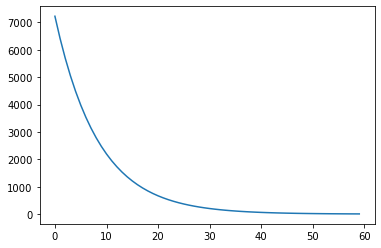

In [43]:
print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

In [44]:
#Descenso de gradiente estocástico
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(x)):
        cost21=single_point_cost(x[i],y[i],w)
        grad_w21=grad(x[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

optimal value w is  0.4999999999999996


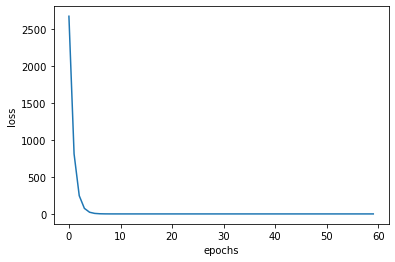

In [45]:
print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)

In [46]:
# let our batch size = 5
#so we will have 2 batches because n=10  and updates will happen 2 times 
w=0
gamma=0.000001
batch_size= 5
all_costs41=[]
for k in range(60):
    for j in range(int(len(x)/batch_size)):
        cost4=0
        for i in range(batch_size):
            z1=single_point_cost(x[i],y[i],w)
            cost4+=z1
        if j==1:
            all_costs41.append(cost4/batch_size) #avearge cost of that batch
        grad_w41=0
        for n in range(batch_size):
            f1=grad(x[i],y[i],w)
            grad_w41+=f1
    
        grad_w42=grad_w41/batch_size  #average grad of that function

        w= w- (gamma * grad_w42)  # update takes place after every batch

optimal value w is  0.4999314426019738


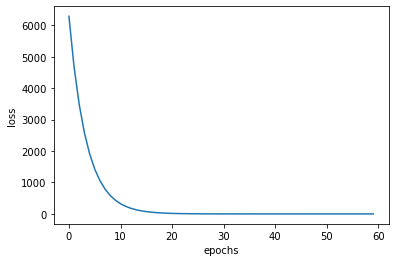

In [47]:
print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs41)

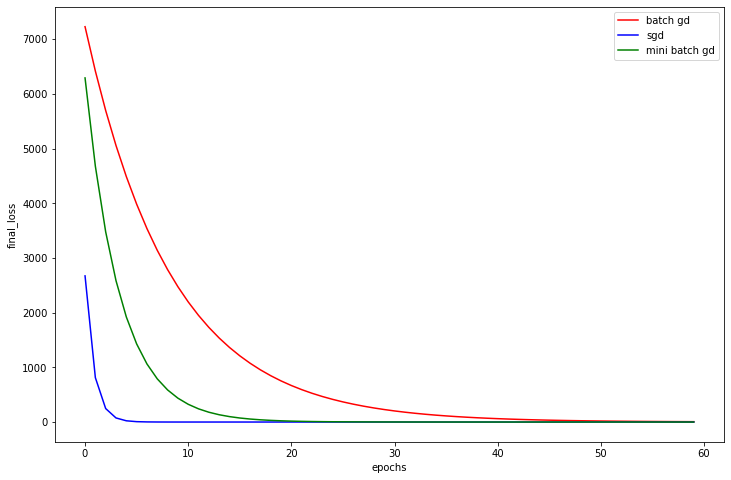

In [48]:
plt.figure(figsize=(12,8))
plt.plot(epochs,all_costs,c='r',label="batch gd")
plt.plot(epochs,all_costs23,c='b',label="sgd")
plt.plot(epochs,all_costs41,c='g',label="mini batch gd")
plt.xlabel("epochs")
plt.ylabel("final_loss")
plt.legend()
plt.show()

Conclusión:
podemos ver que sgd converge más rápido en comparación con el descenso de gradiente regular, 
aunque puede ser ruidoso. Podemos considerar el descenso de gradiente de mini lotes como el 
promedio del descenso de gradiente de lotes y el descenso de gradiente estocástico.

fuente: https://ichi.pro/es/descenso-de-gradiente-en-python-con-ejemplo-67986069776960